# CS171-EE142 - Spring 2021 - Homework 1

# Due: Wednesday, April 14, 2021 @ 11:59pm

### Maximum points: 75 pts


## Submit your solution as a single jupyeter notebook at iLearn.



### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter):  Jorge Ruiz <br>
    Your student ID (submitter): 862155450
    
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>


## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


# Overview 
In this assignment you will explore some basic computations on data and build a nearest neighbor classifier.  

For this assignment we will use the functionality of Pandas (https://pandas.pydata.org/), Matplotlib (https://matplotlib.org/), and Numpy (http://www.numpy.org/). You may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.


Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it). When in doubt, please ask. 


Before you start, make sure you have installed all those packages in your local Jupyter instance


## Read *all* cells carefully and answer all parts (both text and missing code)

1.   List item
2.   List item



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
# make sure you import here everything else you may need

# Question 0: Getting real data [0 pts]
In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris

In [15]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


This data has 150 samples. Each sample has 4 features that are given as ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] and one label. 

The label has three possible values ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [16]:
data.shape
# data.head(5)
# data.tail(5)

(150, 5)

In [17]:
data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can visualize pair-wise relations among 4 features in the data using scatterplot of all pairs of features and color the points by class label 

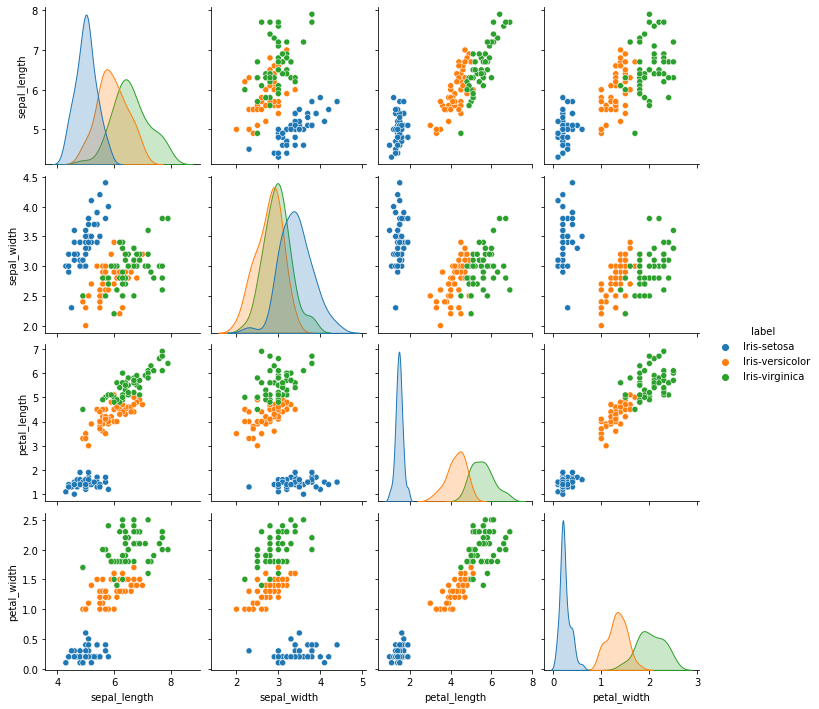

In [18]:
sb.pairplot(data, hue = 'label')

## Question 1: Basic data analysis [25 pts]

## Question 1a: Counting and simple statistics [5]

1. Calculate and print the mean value of each of the four features in the entire dataset [1]

1. Count and print the number of samples that belong to each of the three categories [1] 

1. Calculate and print the mean of each feature for each each label as a $3\times 4$ table. [3]

In [19]:
# your code here 
print("Part 1")
mean = np.mean(data)
print("The mean value of each of the 4 features in the data set are:")
print(mean)

print("\nPart 2")
print("The number of samples that belong to to each of the labels are:")
counts = data.value_counts('label')
print(counts)

print("\nPart 3")
print("The means of each feature separated by label are:")
data_means = data.groupby('label').mean()
print(data_means)


Part 1
The mean value of each of the 4 features in the data set are:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

Part 2
The number of samples that belong to to each of the labels are:
label
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
dtype: int64

Part 3
The means of each feature separated by label are:
                 sepal_length  sepal_width  petal_length  petal_width
label                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


### Question 1b: Implement the $\ell_p$ distance function [10]

1. Write code that implements the $\ell_p$ distance function between two data points [7] \\
$\ell_p$ distance between two vectors $\mathbf{x}_i, \mathbf{x}_j$ in $\mathbb{R}^d$ can be written as  
$$\|\mathbf{x}_i - \mathbf{x}_j\|_p = \left(\sum_{k=1}^d |\mathbf{x}_i(k) - \mathbf{x}_j(k)|^p\right)^{1/p}. $$
You should implement this function yourself. Do not use any built-in function to compute distance or norm. 

2. Verify that it is correct by comparing it for p=1 and p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [3]

In [20]:
# your code here
def LPDistance(xi,xj,p):
    # initialize distance to zero
    distance = 0.0
    # calculate distance between each element of the vector
    for i in range(len(xi)):
        distance += (abs((xi[i] - xj[i]))) ** p
    distance **= (1/p)
    return distance

arr = data.sample(2).drop(["label"], axis = 1).to_numpy()
print("The Manhatten distance using my function is: " + str(LPDistance(arr[0], arr[1], 1)))
print("The Manhatten distance using the built in numpy function is: " + str(np.linalg.norm(abs(arr[0] - arr[1]), 1)))
print("The Euclidian distance using my function is: " + str(LPDistance(arr[0], arr[1], 2)))
print("The Euclidian distance using the built in numpy function is: " + str(np.linalg.norm(abs(arr[0] - arr[1]), 2)))

The Manhatten distance using my function is: 7.999999999999998
The Manhatten distance using the built in numpy function is: 7.999999999999998
The Euclidian distance using my function is: 4.841487374764081
The Euclidian distance using the built in numpy function is: 4.841487374764081


### Question 1c: Compute the distance matrix between all data points [10]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [3]
2. Plot the above matrix and include a colorbar. [3]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [2]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [2]

<function matplotlib.pyplot.show(close=None, block=None)>

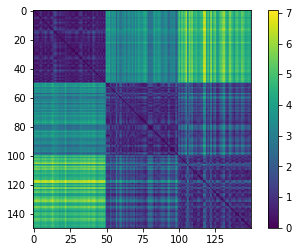

In [21]:
# your code here
matrix = data.drop(["label"], axis = 1).to_numpy()
dist_mat = []
for i in range(len(matrix)):
    dist_mat.append([])
    for j in range(len(matrix)):
        dist_mat[i].append(LPDistance(matrix[i], matrix[j], 2))
plt.imshow(dist_mat)
plt.colorbar()
plt.show

Your answer here:

3. The minimum number of distance computations you can do for this is (150 X 150)/2 = 11,250 distance computations 

4. What I observed in this matrix is if you mirror it along the diagonal going from the top left to the bottom right it is the same. Meaning the upper right triange is equivalent to the lower left triangle

## Question 2: K-Nearest Neighbors Classifier [50]
The K-Nearest Neighbors Classifier is one of the most popular instance-based (and in general) classification models. In this question, we will implement our own version and test in different scenarios.

### Question 2a: Implement the K-NN Classifier [30]
For the implementation, your function should have the format:
```python
def knnclassify(test_data,training_data, training_labels, K=1):
```
where 'test_data' contains test data points, 'training_data' contains training data points, 'training_labels' holds the training labels, and 'K' is the number of neighbors. 

The output of this function should be 'pred_labels' which contains the predicted label for each test data point (it should, therefore, have the same number of rows as 'test_data').


The piece of code below prepares the Iris dataset by converting the labels from strings to integers (which is quite easier to move around and do calculations with):

In [23]:
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = new_labels
print(all_labels)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]


In [10]:
#your code here
def knnclassify(test_data, training_data, training_labels, K=1):
    pred_labels = []
    for i in range(len(test_data)):
        dist = []
        for j in range(len(training_data)):
            # Calculate distance between test data and training data and pair with labels
            dist.append(LPDistance(test_data[i], training_data[j], 2))
        # create tuple and sort based on distance
        dist_tup = zip(dist, training_labels)
        dist_tup = sorted(dist_tup, key = lambda x: x[0])
        
        # find most common label
        tmp_label = Counter(tup[1] for tup in dist_tup[0:K]).most_common(1)
        pred_labels.append(tmp_label[0][0])
    # return predicted label
    return pred_labels
(training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
pred_labels = knnclassify(test_data, training_data, training_labels)
print(pred_labels)

[2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0]


### Question 2b: Measuring performance [20]

In this question you will have to evaluate the average performance of your classifier for different values of $K$. In particular, $K$ will range in $\{1,\cdots,10\}$. We are going to measure the performance using classification accuracy. For computing the accuracy, you may use
```python
accuracy = sum(test_labels == pred_labels)/len(test_labels)
```
where 'test_labels' are the actual class labels and 'pred_labels' are the predicted labels


In order to get a proper estimate for the accuracy for every K, we need to run multiple iterations where for each iteration we get a different randomized split of our data into train and test. In this question, we are going to run 100 iterations for every K, and for every random splitting, you may use:

```python
    (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
```
where the train/test ratio is 70/30. 

After computing the accuracy for every $K$ for every iteration, you will have 100 accuracies per $K$. The best way to store those accuracies is in a matrix that has as many rows as values for $K$ and 100 columns, each one for each iteration.

Compute average accuracy as a function of $K$. Because we have a randomized process, we also need to compute how certain/uncertain our estimation for the accuracy per $K$ is. For that reason, we also need to compute the standard deviation of the accuracy for every $K$. Having computed both average accuracy and standard deviation, make a figure that shows the average accuracy as a function of $K$ with each point of the figure being surrounded by an error-bar encoding the standard deviation. You may find 
```python
plt.errorbar()
```
useful for this plot.

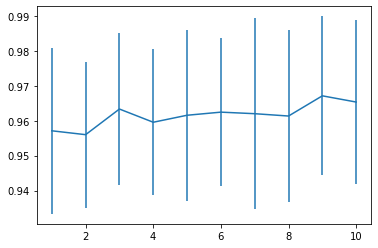

In [11]:
#your code here
k_vals = [1,2,3,4,5,6,7,8,9,10]
result = []
for k in k_vals:
    tmp = []
    for i in range(100):
        (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.3)
        pred_labels = knnclassify(test_data, training_data, training_labels, k)
        accuracy = sum(test_labels == pred_labels)/len(test_labels)
        tmp.append(accuracy)
    result.append(tmp)
#result = np.array(result)
mean_list = []
std_list = []
for row in result:
    row = np.array(row)
    mean_list.append(row.mean())
    std_list.append(row.std())
plt.errorbar(k_vals, mean_list, std_list)
plt.show()
#print(result_list)